In [37]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
result = pd.read_csv("../raw_data/input_data.csv").drop(columns="Unnamed: 0")

In [3]:
result.head()

,fichier,translation
0,0037fbb3-844e-477e-8432-bf93ab0b678c_translati...,"Création d'un AMI, ami 1 50 le lundi premier o..."
1,035ba22d-af77-42ff-9a5a-d6c0969f18cf_translati...,Créer une ami 1 50 faite au cabinet ce matin à...
2,038b4861-80a8-4615-bc74-28023bf4a62b_translati...,Ajouter une ami 1 50 à la visite de ce matin.
3,038cf73c-1508-44e9-b3b0-7d0e3a320a66_translati...,Prise de sang faite au cabinet le 22 juillet à...
4,039a13db-4d36-422b-ac3d-e1d682dac08f_translati...,Création d'un ami 1 50 réalisé à 8h00 au cabin...


In [51]:
LOCAL_PATH = "../raw_data/targets"

fichiers = [fichier for fichier in listdir(LOCAL_PATH) if isfile(join(LOCAL_PATH, fichier))]

data = []
for fichier in fichiers :
    lib_fichier = LOCAL_PATH + "/" + fichier
    with open(lib_fichier) as mon_fichier:
        data.append(json.load(mon_fichier))

treatments = [data[i]["Treatments"][0]['TreatmentCares'][0]['TreatmentDetected'] for i in range(len(data))]
ngap = [data[i]["Treatments"][0]['TreatmentCares'][0]['NGAP'] for i in range(len(data))]
cotation = [data[i]["Treatments"][0]['TreatmentCares'][0]['Cotation'] for i in range(len(data))]

# création d'un dataframe
data = pd.DataFrame({'fichier': fichiers, 'Treatments': treatments, 'NGAP':ngap, 'Cotation':cotation})
data.head()

,fichier,Treatments,NGAP,Cotation
0,2206f47b-a858-4f23-8696-d10e1050f2d7_6ad77b18-...,None,SC,None
1,c619f0e1-7c22-4047-adb2-df4dec6643ba_1013078c-...,None,PSG,None
2,9f980dcf-b431-4e67-876f-2b8e288b7900_81de811a-...,None,PSG,None
3,2d035c4b-cdfa-4982-87dc-916fe07a0824_760f30f6-...,None,PSG,None
4,2d035c4b-cdfa-4982-87dc-916fe07a0824_6265ee25-...,None,TAID19,None


In [59]:
data["Treatments"].unique()

array([None], dtype=object)

In [60]:
data["NGAP"].unique()

array(['SC', 'PSG', 'TAID19', 'PLE', 'PSTA', 'IM', 'PSTL', None, 'LAVE',
       'TAIC19', 'OBSD', 'PVAG', 'ADM2', 'PC19', 'BSA', 'PV19', 'PUGC',
       'CFAP', 'FPL', 'VC19', 'CFFB', 'NUR1', 'PINJI19', 'ADM1', 'PLB',
       'NUR2', 'INJS', 'FAP', 'SSCP', 'OBSP', 'CSC', 'PSTD', 'ABFM',
       'PLVA', 'CFPC', 'ABFP', 'PLM', 'PSTO', 'AERO', 'FFB', 'BSC',
       'SICR', 'PSTS', 'SHSD', 'PSD19', 'ISCI', 'PLU', 'TAC19', 'BSI1',
       'PINJ19', 'CFPL', 'TAG19NR', 'SSI2', 'BSI2', 'FPC', 'VDSI19',
       'TAI3D19', 'IISC', 'DSI1', 'ALIS', 'RSU', 'BSB', 'CATV', 'BSI3',
       'INJ19', 'CSUF', 'IVD', 'PSTE', 'ATPUGC', 'SAIG', 'CSUH', 'CIM',
       'SSI1', 'PLVC', 'DIAL', 'PSC19', 'BPL', 'ALIC', 'ATPLU', 'RSUPO'],
      dtype=object)

In [61]:
data["NGAP"].nunique()

79

In [62]:
table_ngap = pd.read_csv("../raw_data/table_ngap.csv", sep=";")
table_ngap.columns = ['NGAP', 'AllowanceCodeList', 'Coefficient', 'Designation', 'NgapId']

In [63]:
table_ngap["NGAP"].unique()

array(['TLS', 'TLL', 'TLD', 'SICR', 'ATPD', 'SHSD', 'PSTD', 'ISCI',
       'OBSD', 'TAG19NR', 'PLE', 'PLB', 'PUGC', 'PSTL', 'ATPLE', 'PLM',
       'ATPUGC', 'PLP', 'PLR', 'PLF', 'BPL', 'PLO', 'PLA', 'ATPLU', 'PLU',
       'ADPM3', 'OBSP', 'ADM2', 'ADPM2', 'ADM1', 'ADPM1', 'HN', 'SCPAPO',
       'CFRDPO', 'RSUPO', 'SCAPO', 'IVI', 'ALL', 'INJS', 'IVD', 'VAGM',
       'IM', 'IVE', 'GAGR', 'ID', 'SC', 'PSG', 'PLVA', 'SVAG', 'SAIG',
       'IISC', 'PVAG', 'GAR1', 'GAR2', 'CATP', 'CATV', 'CSC', 'CIPA',
       'CFPC', 'CFPL', 'CFAP', 'CFSC', 'CSAP', 'CIV', 'CFSP', 'CFFB',
       'CIM', 'PSTA', 'PSTO', 'PSTS_AMI2', 'PSTS', 'ABFP', 'PSTE', 'ABFM',
       'PSTT', 'PSTT_AMI225', 'DIAL', 'DIAS', 'DIAB', 'IRRI', 'INJC',
       'INJA', 'INJI', 'PLVC', 'CSUF', 'PIEP', 'CSUH', 'GYNE', 'CATF',
       'ILV', 'EDUC', 'RSU', 'REAV', 'INJV', 'CATH', 'LECT', 'TEST',
       'PULV', 'NUR1', 'SSCP', 'DSI1', 'DSI2', 'SSI1', 'SAP', 'SSI2',
       'NUR2', 'MUCO', 'FPC', 'FAP', 'FSC', 'FFB', 'FPL', 'FSP', 'LAVE',


In [64]:
table_ngap["NGAP"].nunique()

156

In [80]:
df = pd.DataFrame(data.groupby("NGAP").count()["fichier"]).sort_values(by="fichier", ascending=False).reset_index()
df = df.merge(table_ngap)
df["percentage"] = df["fichier"]/len(data)

In [81]:
df

,NGAP,fichier,AllowanceCodeList,Coefficient,Designation,NgapId,percentage
0,PSG,1499,AMI,"1,5",Prise de sang (prélèvement par ponction veineu...,7120e91c-1f7e-48d3-894a-34cd403dffb4,0.367582
1,PV19,514,AMI,"4,2",Prélèvement nasopharyngé ou prélèvement sangui...,ae340e3d-39b3-4037-9249-35f199c47ef8,0.126042
2,TAID19,289,AMI,"9,5",Test antigénique individuel à domicile,747aede8-431b-41d7-a239-be4e4d1856d2,0.070868
3,PSTA,230,AMI,2,Autre pansement,bdff8960-b5e2-427b-be41-d004ffef3a8c,0.056400
4,PC19,222,AMI,"3,1",Prélèvement nasopharyngé au cabinet ou réalisé...,c276df18-3a71-45b8-aa1f-3f3cbb562312,0.054438
...,...,...,...,...,...,...,...
73,CSUH,1,AMI,4,Changement de sonde urinaire chez l'homme à de...,901b9ad1-6e19-46df-bb43-5dfcc145097d,0.000245
74,INJ19,1,INJ,1,Injection du vaccin COVID-19,015b2979-00fc-4140-b8d5-27dd98fe12ec,0.000245
75,PSC19,1,AMI,"1,9",Prélèvement salivaire au cabinet ou réalisé à ...,8a08fe1a-031d-442b-beef-aaef6df1e54d,0.000245
76,PLVC,1,AMI,1,Prélèvement sanguin sur cathéter veineux centr...,12e1a730-e368-4d28-b96d-e3e335dd5605,0.000245


In [107]:
len(df[df['fichier']>20])

18

<AxesSubplot:xlabel='NGAP', ylabel='percentage'>

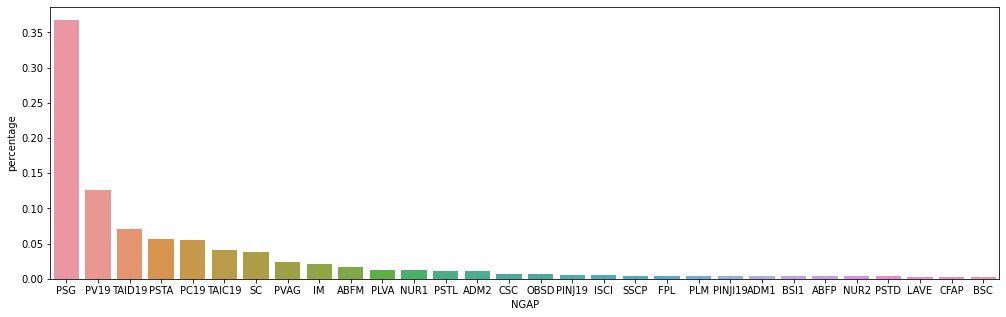

In [83]:
fig = plt.figure(figsize=(17,5))
sns.barplot(x="NGAP", y="percentage", data=df.head(30))

In [98]:
test = df.copy()
test.sort_values("percentage", ascending=False, inplace=True)
test['cum'] = test["percentage"].cumsum()
test

,NGAP,fichier,AllowanceCodeList,Coefficient,Designation,NgapId,percentage,cum
0,PSG,1499,AMI,"1,5",Prise de sang (prélèvement par ponction veineu...,7120e91c-1f7e-48d3-894a-34cd403dffb4,0.367582,0.367582
1,PV19,514,AMI,"4,2",Prélèvement nasopharyngé ou prélèvement sangui...,ae340e3d-39b3-4037-9249-35f199c47ef8,0.126042,0.493624
2,TAID19,289,AMI,"9,5",Test antigénique individuel à domicile,747aede8-431b-41d7-a239-be4e4d1856d2,0.070868,0.564492
3,PSTA,230,AMI,2,Autre pansement,bdff8960-b5e2-427b-be41-d004ffef3a8c,0.056400,0.620893
4,PC19,222,AMI,"3,1",Prélèvement nasopharyngé au cabinet ou réalisé...,c276df18-3a71-45b8-aa1f-3f3cbb562312,0.054438,0.675331
...,...,...,...,...,...,...,...,...
73,CSUH,1,AMI,4,Changement de sonde urinaire chez l'homme à de...,901b9ad1-6e19-46df-bb43-5dfcc145097d,0.000245,0.983325
74,INJ19,1,INJ,1,Injection du vaccin COVID-19,015b2979-00fc-4140-b8d5-27dd98fe12ec,0.000245,0.983570
75,PSC19,1,AMI,"1,9",Prélèvement salivaire au cabinet ou réalisé à ...,8a08fe1a-031d-442b-beef-aaef6df1e54d,0.000245,0.983816
76,PLVC,1,AMI,1,Prélèvement sanguin sur cathéter veineux centr...,12e1a730-e368-4d28-b96d-e3e335dd5605,0.000245,0.984061


In [101]:
test[test["cum"]<=0.82]

,NGAP,fichier,AllowanceCodeList,Coefficient,Designation,NgapId,percentage,cum
0,PSG,1499,AMI,"1,5",Prise de sang (prélèvement par ponction veineu...,7120e91c-1f7e-48d3-894a-34cd403dffb4,0.367582,0.367582
1,PV19,514,AMI,"4,2",Prélèvement nasopharyngé ou prélèvement sangui...,ae340e3d-39b3-4037-9249-35f199c47ef8,0.126042,0.493624
2,TAID19,289,AMI,"9,5",Test antigénique individuel à domicile,747aede8-431b-41d7-a239-be4e4d1856d2,0.070868,0.564492
3,PSTA,230,AMI,2,Autre pansement,bdff8960-b5e2-427b-be41-d004ffef3a8c,0.056400,0.620893
4,PC19,222,AMI,"3,1",Prélèvement nasopharyngé au cabinet ou réalisé...,c276df18-3a71-45b8-aa1f-3f3cbb562312,0.054438,0.675331
5,TAIC19,169,AMI,"8,3",Test antigénique individuel au cabinet,415f5133-7ff7-47a2-8863-e51dc4a43199,0.041442,0.716773
6,SC,157,AMI,1,Injection sous cutanée,720afa9b-5e9c-41bf-a219-0788991f5e43,0.038499,0.755272
7,PVAG,98,AMI,1,Prescription et injection d'un vaccin antigrip...,c58b3d84-cf2c-4d18-aa67-f78ef46f63c5,0.024031,0.779304
8,IM,87,AMI,1,Injection intramusculaire,25d58b68-55d1-4d46-be01-cc5176ee6ab7,0.021334,0.800638
9,ABFM,67,AMI,2,"Ablation de fils ou d'agrafes, dix ou moins, y...",b57c7588-807d-453c-90f6-5b9a61b1046a,0.016430,0.817067


In [104]:
len(test[test["percentage"]<0.001])

31

<AxesSubplot:xlabel='NGAP', ylabel='cum'>

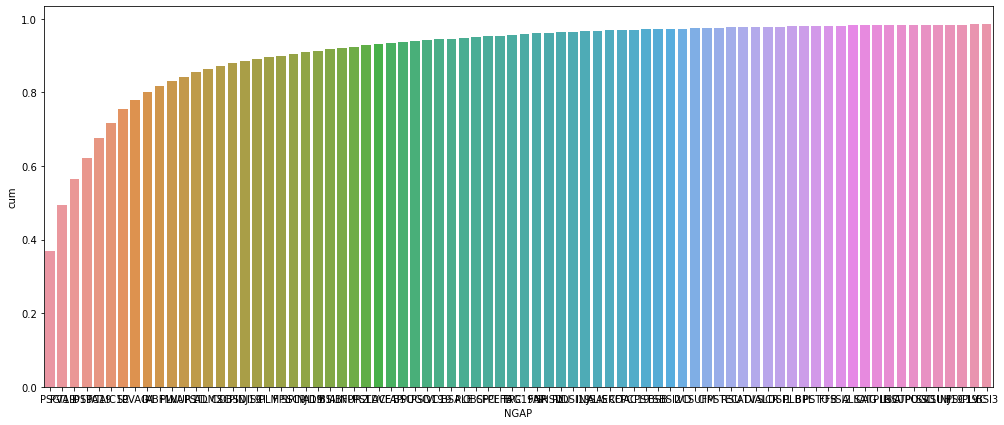

In [99]:
fig = plt.figure(figsize=(17,7))
sns.barplot(x="NGAP", y="cum", data=test)

In [43]:
top_thirty.iloc[1,4]

'Prélèvement nasopharyngé ou prélèvement sanguin à domicile pour un patient covid-19 réalisé seul'

In [44]:
top_thirty.iloc[2,4]

'Test antigénique individuel à domicile'

In [45]:
top_thirty.iloc[4,4]

'Prélèvement nasopharyngé au cabinet ou réalisé à domicile avec un autre acte hors sérologie pour un patient suspecté d’infection covid-19'

In [46]:
top_thirty.iloc[5,4]

'Test antigénique individuel au cabinet'

In [47]:
top_thirty.iloc[16,4]

'Prescription et Injection du vaccin contre le COVID-19'

In [48]:
top_thirty.iloc[21,4]

'Prescription et Injection du vaccin contre le COVID-19 à domicile hors soins infirmiers'

In [49]:
liste = [1,2,4,5,16,21]
total = 0
for elm in liste:
    total += top_thirty.iloc[elm,6]
total


0.3028445316331535

# ML